In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [47]:
from util import PROJECTS_FILE, FILTERED_FILE
#reads projects from Excel file
df = pd.read_excel(PROJECTS_FILE, keep_default_na=False)
len(df)

17370

In [48]:
# df=df[df.stargazers >= 5000]
# len(df)

In [49]:
df = df[df.contributors >= 5]
df = df[df.commits >= 1000]
len(df)

6498

In [50]:
df = df[df.languages > 0]
len(df)

6419

In [51]:
df.primaryLanguage.value_counts()

JavaScript    947
Python        871
C++           603
Java          602
Go            429
             ... 
Arc             1
Smarty          1
Factor          1
CartoCSS        1
PostScript      1
Name: primaryLanguage, Length: 109, dtype: int64

In [52]:
type(df)

pandas.core.frame.DataFrame

In [53]:
#filters repositories by language, keeping just the ones that use the top 10 languages in the corpus 
df = df[df.primaryLanguage.isin(["JavaScript", "Java", "C", "C++", "C#", "Python", "PHP", "Go", "Swift", "Ruby"])]
len(df)

4872

In [54]:
df = df.sort_values(by=['primaryLanguage', 'stargazers', 'commits'])

In [55]:
# pd.set_option('display.max_colwidth', -1) 
# df

In [56]:
# df.describe()

In [57]:
#saves filtered projetcts to Excel
#removes timezone from dates, since Excel does not know how to handle that
df.createdAt = pd.to_datetime(df.createdAt).dt.tz_localize(None) 
df.pushedAt = pd.to_datetime(df.pushedAt).dt.tz_localize(None)
df.to_excel(FILTERED_FILE, index=False)

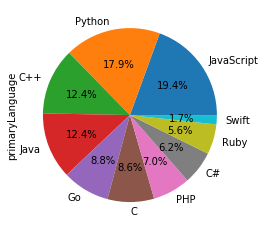

In [58]:
df.primaryLanguage.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [59]:
# hist = df.hist(column=['stargazers'], bins=50)

In [60]:
# hist = df.hist(column=['languages'], bins=50)

In [61]:
# hist = df.hist(column=['contributors'], bins=100)

In [62]:
# hist = df.hist(column=['issues'], bins=100)

In [63]:
# hist = df.hist(column=['commits'], bins=100)

In [64]:
# hist = df.hist(column=['branches'], bins=100)

In [65]:
# hist = df.hist(column=['diskUsage'], bins=100)
# plt.xlabel("KB")

In [66]:
# corr = df.drop('isMirror', axis=1).corr()
# corr.style.background_gradient(cmap='Reds')